In [2]:
##########################
# CS 430 Final Project
# Emily Warman, Rachael Affenit
# Local Approach
##########################

import os
import copy
import itertools
import matplotlib.pyplot as plt
import math

In [3]:
%matplotlib inline

def plot(points,lines):
    plt.scatter(*zip(*points))
    axes = plt.gca()
    #plot lines drawn
    for line in lines:
        if line[1]==0:
            plt.plot([line[0], line[0]],[0,len(points)], color='b', linestyle='-',linewidth=2)
        else:
            plt.plot([0,len(points)],[line[0],line[0]], color='b', linestyle='-', linewidth=2)
    plt.show()
    
#get all permutations of a list of possible lines
def get_combinations(lines):
    return itertools.combinations(lines,2)

def get_combinations_adjustable(lines,num):
    return itertools.combinations(lines,num)

#make a list of possible lines (range function that takes floats)
def drange(x, y, jump):
    r=[]
    while x < y:
        r.append(float(x))
        x += jump
    return r

#create lists of possible points (min x to max x, min y to max y)
#O(nlogn)
def get_all_possible(points):
    x_sort = sorted(points, key=lambda x: x[0])
    y_sort = sorted(points, key=lambda x: x[1])
    x_min = x_sort[0][0]
    x_max = x_sort[-1][0]
    y_min = y_sort[0][1]
    y_max = y_sort[-1][1]
    x = [0]*len(x_sort)
    y = [1]*len(y_sort)
    
    return (list(zip(drange(x_min+.5,x_max+.5,1),x))), (list(zip(drange(y_min+.5,y_max+.5,1),y)))
    #return drange(x_min+.5,x_max+.5,1)
    
def get_possible(points):
    x_sort = sorted(points, key=lambda x: x[0])
    y_sort = sorted(points, key=lambda x: x[1])
    x_min = x_sort[0][0]
    x_max = x_sort[-1][0]
    y_min = y_sort[0][1]
    y_max = y_sort[-1][1]
    x = [0]*len(x_sort)
    y = [1]*len(y_sort)
    
    return (list(zip(drange(x_min+.5,x_max+.5,1),x))) + (list(zip(drange(y_min+.5,y_max+.5,1),y)))
    #return drange(x_min+.5,x_max+.5,1)

def get_x_y_lines(lines,max_line):
    x_lines=[0,max_line]
    y_lines=[0,max_line]
    for line in lines:
        if line[1] == 0:
            x_lines.append(line[0])
        else:
            y_lines.append(line[0])
    return sorted(x_lines),sorted(y_lines)

def collisions(points,lines):
    n=len(points)+1
    x_interval,y_interval=get_x_y_lines(lines,n)
    boxes=[]
    #print("X Interval",x_interval)
    #print("Y Interval",y_interval)
    for point in points:
        #print("Point:",point)
        #find box of point
        #print(point)
        x_box=0
        while point[0]>=x_interval[x_box] and x_box<len(x_interval):
            x_box+=1
        y_box=0
        while point[1]>=y_interval[y_box] and y_box<len(y_interval):
            y_box+=1
        box = (x_box-1,y_box-1)
        #print("Box assigned:",box)
        if box in boxes:
            #print("Collision Here")
            return True
        else:
            boxes.append(box)
    return False

def generate_possible_lines(points,lines_drawn):
    all_possible = get_possible(points)
    for line in lines_drawn:
        if line in all_possible:
            all_possible.remove(line)
    return(all_possible)

def remove_line(points,lines_drawn):
    x = get_combinations(lines_drawn)
    possible_lines = generate_possible_lines(points,lines_drawn)
    #print("Possible Lines",possible_lines)
    sol=[]
    for pair in x:
        lines_drawn.remove(pair[0])
        lines_drawn.remove(pair[1])
        possible_lines.append(pair[0])
        possible_lines.append(pair[1])
        for possible_line in possible_lines:
            lines_drawn.append(possible_line)
            #print("Checking... Removed:",pair,"Added:",possible_line)
            #plot(points,lines_drawn)
            if not collisions(points,lines_drawn):
                #print("Removed:",pair,"Added",possible_line)
                sol.append(copy.copy(lines_drawn))
            lines_drawn.remove(possible_line)
        lines_drawn.insert(0,pair[1])
        lines_drawn.insert(0,pair[0])
        possible_lines.remove(pair[0])
        possible_lines.remove(pair[1])
    return sol

def reverse_solution(points):
    all_lines = get_possible(points)
    OPT = math.ceil(math.sqrt(len(points))*2)-2
    x=get_combinations_adjustable(all_lines,len(points)-4)
    for combo in x:
        if not collisions(points,combo):
            return combo
    return None

In [6]:
def solution(points):
    x_lines,y_lines = get_all_possible(points)
    #x_lines = ll
    sol = [x_lines]
    best_sol = copy.copy(sol[0])
    avg_len=len(x_lines)
    while sol:
        nxt = sol.pop()
        if len(nxt)<len(best_sol):
            best_sol = copy.copy(nxt)
        one_less_line_stack = remove_line(points,nxt)
        if one_less_line_stack:
            print("Num lines in solutions:",sum([len(x) for x in one_less_line_stack])/len(one_less_line_stack))
            sol = one_less_line_stack
        #print(add_to_stack)
            #if sum([len(x) for x in add_to_stack])/len(add_to_stack) < avg_len:
                #sol = add_to_stack
            #else:
                #sol.extend(add_to_stack)
    print(len(best_sol),"returning at best")
    return best_sol

Num lines in solutions: 25.0
Num lines in solutions: 24.0
Num lines in solutions: 23.0
Num lines in solutions: 22.0
Num lines in solutions: 21.0
Num lines in solutions: 20.0
Num lines in solutions: 19.0
Num lines in solutions: 18.0
Num lines in solutions: 17.0
Num lines in solutions: 16.0
Num lines in solutions: 15.0
Num lines in solutions: 14.0
Num lines in solutions: 13.0
13 returning at best
[(23.5, 0), (2.5, 1), (15.5, 0), (20.5, 0), (18.5, 0), (10.5, 1), (25.5, 0), (11.5, 0), (10.5, 0), (7.5, 0), (4.5, 0), (2.5, 0), (18.5, 1)]


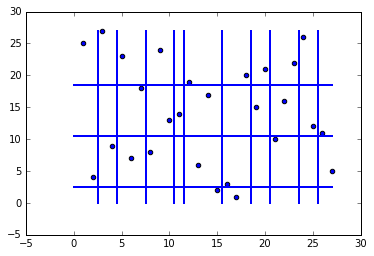

In [10]:
##########################
# Main Program: Import Data
##########################
#for filename in os.listdir(os.getcwd()+'/input'):
    
def read_file(filename):
    points = []
    with open('input/'+filename, 'r') as f:
        inpt = f.readlines()
        for point in inpt[1:]:
            point = point.split(' ')
            points.append(((int(point[0])),(int(point[1]))))
    return points

points = read_file('instance04.txt')
x_lines,y_lines=get_all_possible(points)
ld = solution(points)
print(ld)
plot(points,ld)